# Exploratory Data Analysis


Note: This notebook uses ipywidgets to create interactive plots. If you are viewing this notebook on GitHub, the interactive plots will not be displayed. To view the interactive plots, please clone the repository and run it locally.

# 1. Import Python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import re

# 2. Loading and Categorizing the Dataset

In [2]:
data = pd.read_csv('data/Family Income and Expenditure.csv')

Removing the outliers in the dataset based on the z-scores of the total household income.

In [3]:
from utils.data_utils import remove_income_outlier
data = remove_income_outlier(data)

Categorizing the data into: expenditures, income, household head, appliances, property, and family composition.

In [4]:
from utils.data_utils import get_expenditures_data, get_income_data, get_householdhead_data, get_appliances_data, get_property_information, get_family_composition

expenditures_data = get_expenditures_data(data)
income_data = get_income_data(data)
householdhead_data = get_householdhead_data(data)
appliances_data = get_appliances_data(data)
property_data = get_property_information(data)
family_composition_data = get_family_composition(data)

# Checking if all of the columns have been categorized 
collection = expenditures_data +  income_data + appliances_data +  householdhead_data + family_composition_data +  property_data
missing = [element for element in data.columns if element not in collection]
print(missing)


['Region']


The only data column missing from the collection is 'Region', which does not need to be categorized. Thus, we know that all of the columns have been categorized.

# 3. Income and Expenditures

We seek to answer the following questions:

1. What are the regions with the highest and lowest average family income?
2. How do family expenditures differ across regions?
3. What are the major expense categories for families in different regions?
4. Is there a correlation between family income and certain types of expenditures?
5. Are there any significant outliers in the data that indicate unique economic conditions in certain regions?

In [5]:
from ipywidgets import interact, fixed
from utils.bar_utils import bar_chart_regional_average, stacked_bar
from utils.regional_utils import create_dataframe_min_max

## 3.1 Visualizing expenditures per region using bar charts

The total household income and various expenditures per region using bar charts. The dropdown menu can be used to select a certain expenditure. The regions with lowest and highest values are denoted by red and green, respectively. 



In [6]:
keys = ['Total Household Income'] + expenditures_data
interact(bar_chart_regional_average, data=fixed(data), key=keys, average=True)

interactive(children=(Dropdown(description='key', options=('Total Household Income', 'Total Food Expenditure',…

<function utils.bar_utils.bar_chart_regional_average(data, key: str)>

In [7]:
# Summary of regional average icome and expenditures, showing the region with the highest (0) and lowest (1) average income and expenditures.
max_min_dataframe = create_dataframe_min_max(data, keys)
max_min_dataframe

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses
0,NCR,NCR,CAR,VIII - Eastern Visayas,NCR,ARMM,NCR,CAR,NCR,II - Cagayan Valley,III - Central Luzon,NCR,NCR,IVA - CALABARZON,NCR,NCR,NCR,NCR,IVA - CALABARZON,ARMM
1,ARMM,X - Northern Mindanao,II - Cagayan Valley,IX - Zasmboanga Peninsula,ARMM,X - Northern Mindanao,X - Northern Mindanao,X - Northern Mindanao,ARMM,ARMM,CAR,ARMM,ARMM,ARMM,ARMM,ARMM,ARMM,ARMM,ARMM,NCR


NCR has the highest average household income and food expenditures. The region also has the highest expenditures in meat, fruits, restaurant and hotels, clothing, housing and water, transportation, communication, education, and miscellaneous goods and services. Meanwhile, it had the lowest expenditures for crop farming and gardening.

* As the country's economic and political center, there are more lucrative job opportunities not available in other regions. The availability of opportunities brings more people to the region, resulting in higher demand for housing, consequently raising the costs.
* Similar to housing, other basic necessities such as food are more expensive in the region due to the increased demand. This may also be explained by more expensive food preferences of the residents, i.e. having higher meat and fruits expenditures, which tend to be more expensive than food staples such as bread, cereals, and rice.
* Having the highest expenditures on restaurants and hotels and miscellaneous goods and services may be explained by the availability of such establishments in the region (being highly urbanized) and the expectantly higher disposable income of the residents from having higher income. Furthermore, the urban lifestyle (which gets really busy) may also result in more frequent dining out.
* Communication expenditures may be explained by the increased demand for connectivity, i.e. work, school, socialization, and the availability of high-end services, such as faster and more expensive internet plans.
* Clothing expenditures may be explained by the urban lifestyle, e.g. keeping up with the trends from social media, occupations that require more "professional" attire.
* Transportation expenditures in NCR could be explained by long commutes to work/school using various transportation modes such as buses, trains, jeepneys, and taxis. Although NCR is considered highly urbanized, work and school can be in a city different from one's residence. For instance, Malabon is a city in NCR also considered as highly urbanized, with a lot of job opportunities, but some residents still have a preference for jobs/universities in QC, Manila, Makati, etc., because the jobs are usually blue collar, contractual, or "arawan", while schools are limited to community colleges.
* The region has the lowest expenditures in crop farming and gardening, which is expected from being highly urbanized with limited space for agriculture.

Meanwhile, CALABARZON has the highest medical care and special occasions expenditures, CAR for bread and cereals, Eastern Visayas for rice, ARMM for fish and marine and crop farming and gardening, Cagayan Valley for alcoholic beverages, and Central Luzon for tobacco.

## 3.2 Visualizing the relation between income and expenditures using scatter plot

In [9]:
from utils.scatter_utils import regional_scatter_plot

In [9]:
interact(regional_scatter_plot, data=fixed(data), key=expenditures_data)

interactive(children=(Dropdown(description='key', options=('Total Food Expenditure', 'Bread and Cereals Expend…

<function scatterplot.regional_scatter_plot(data, key)>

In [10]:
from utils.regional_utils import create_dataframe_r_squared

In [11]:
create_dataframe_r_squared(data, expenditures_data)

,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses
0,0.859357,0.085705,0.152314,0.857656,0.006752,0.307691,0.206828,0.853440,0.205927,0.247423,0.764454,0.924941,0.670791,0.889566,0.940686,0.745108,0.918358,0.242606,0.197086
1,0.927015,0.292754,0.390274,0.926097,0.082168,0.554699,0.454783,0.923818,0.453792,0.497416,0.874331,0.961739,0.819018,0.943168,0.969890,0.863196,0.958310,0.492551,0.443944


The five expenditures that show the strongest connection (correlation) with household income are: Communication Expenditure, Miscellaneous Goods and Services Expenditure, Housing and Water Expenditure, Transportation Expenditure, and Total Food Expenditure. This means that these are the expenses that tend to move together with changes in household income and will be important features when creating a predictive model later on. These correlations are congruent to the data describing which regions have the highest expenditure for each category, i.e. NCR having the highest income also has the highest expenditures in the top 5 strongly-correlated expenditures.

## 3.3 Visualizing the differences in income and expenditure through a choropleth map

In [28]:
from utils.choropleth_utils import load_regions_geodataframe, regional_averages_name_clean, choropleth

In [34]:
regions_gdf_clean = load_regions_geodataframe()
regional_averages = regional_averages_name_clean(data, keys)

In [35]:
# Adding regional averages to the regions_clean dataframe
merged_df = pd.merge(regions_gdf_clean, regional_averages, left_on='REGION', right_on='Region', how='left')

In [36]:
interact(choropleth, merged_df=fixed(merged_df), key=keys)

interactive(children=(Dropdown(description='key', options=('Total Household Income', 'Total Food Expenditure',…

<function utils.choropleth_utils.choropleth(merged_df, key)>

The National Capital Region (NCR) had the brightest color for the total household income and the expenditures in which it had the highest values. For the income and most of the expenditures, there is a gradual spread of brightness from NCR which implies that NCR's economic prosperity influences its neighboring regions to some extent. The economic activity and opportunities in the capital appear to have a ripple effect, albeit diminishing, on the adjacent areas.

This map also showcases the geographical features of the capital city of Manila, i.e. the natural harbor. This natural harbor has historically played a crucial role in the economic development of the National Capital Region. The presence of a well-positioned natural harbor in Manila has facilitated trade and commerce, making it a hub for maritime activities. This advantage has attracted businesses, industries, and investments to the region over time.

## 3.4 Main Sources of Income Per Region

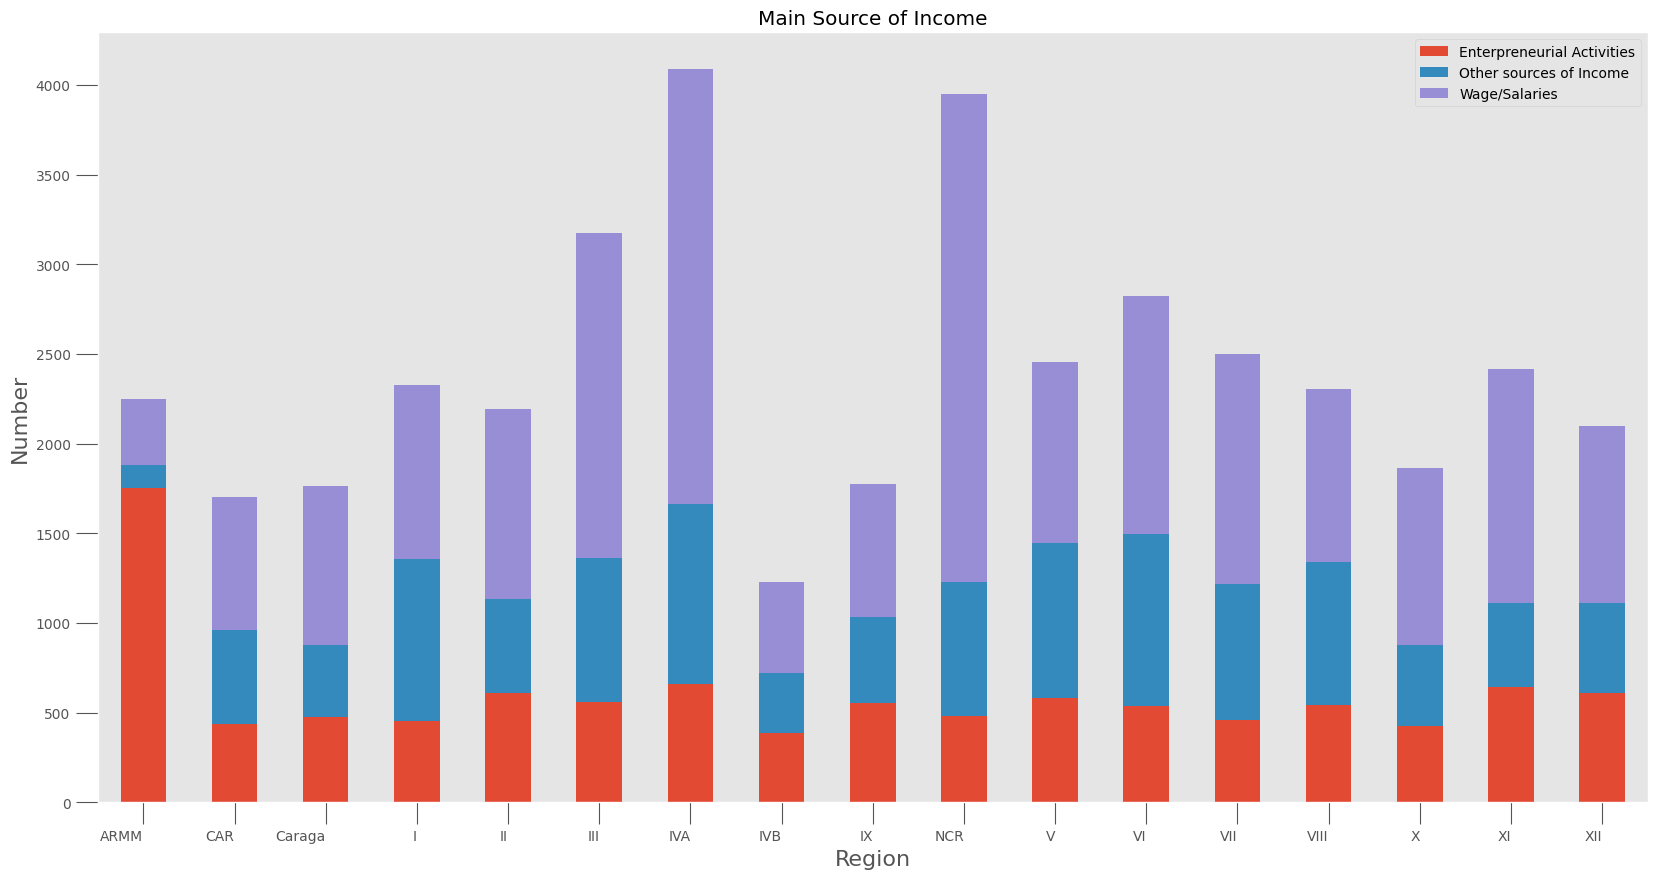

In [37]:
stacked_bar(data, 'Main Source of Income')

## 3.5 Income from Entrepreneural Activities per Region

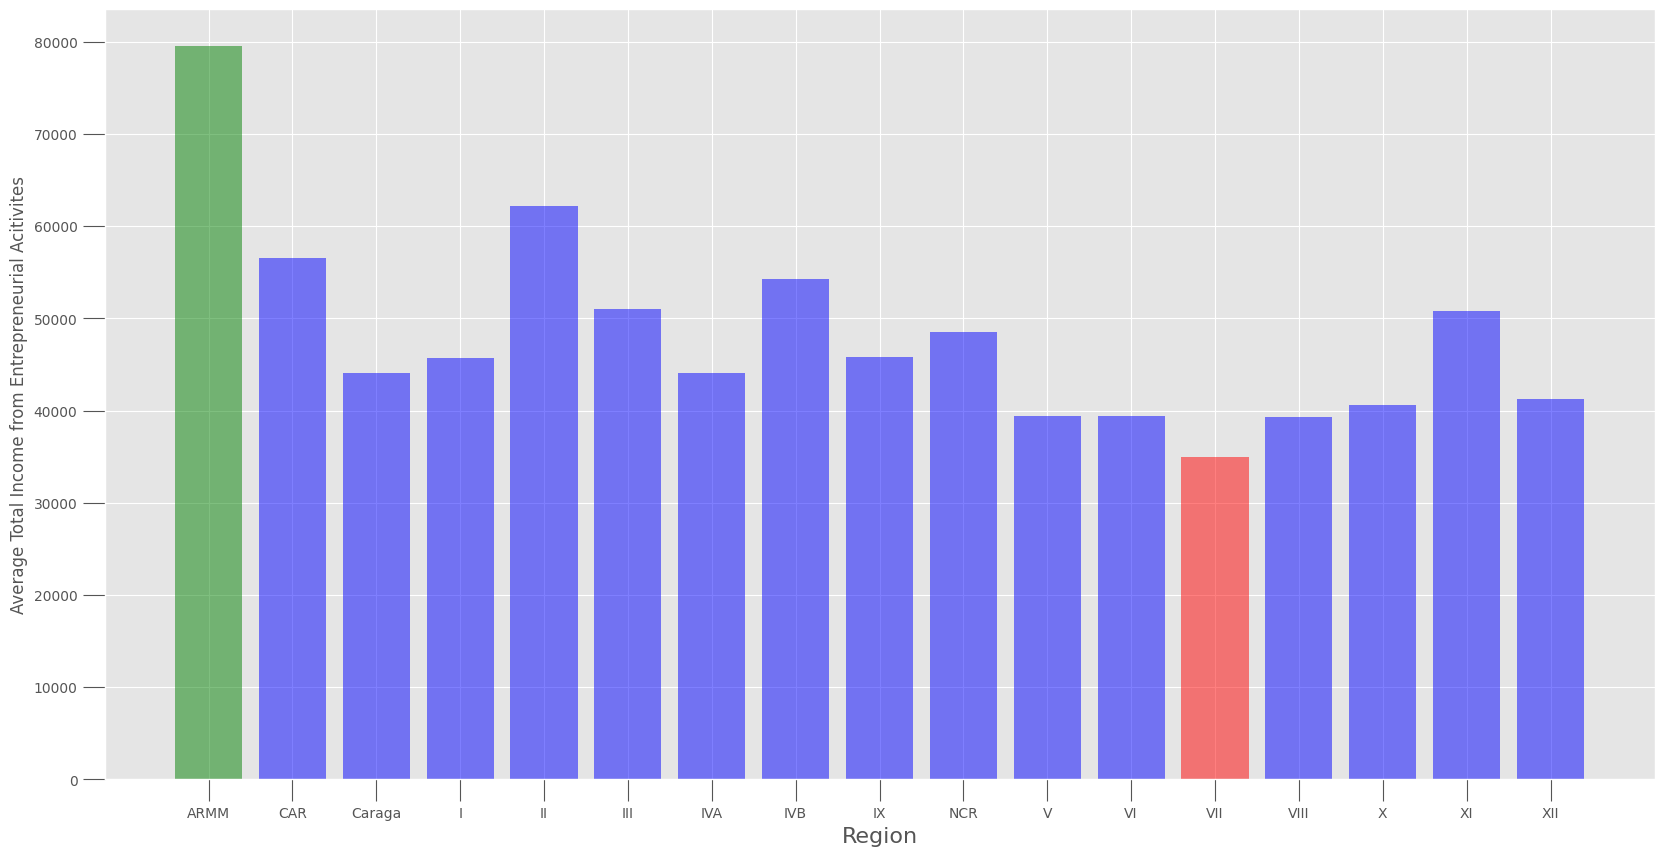

In [17]:
bar_chart_regional_average(data, 'Total Income from Entrepreneurial Acitivites')

In all of the regions, only ARMM relied mostly on entrepreneurial activites as their main source of income. The ARMM region, situated in the southern part of the Philippines, had encountered challenges such as underdeveloped infrastructure, limited access to quality education, and a history of conflict. These factors made it more difficult for traditional industries to thrive and led to a higher reliance on entrepreneurial endeavors.

## 3.5 Correlation of Total Household Income vs Income from Entrepreneural Activities

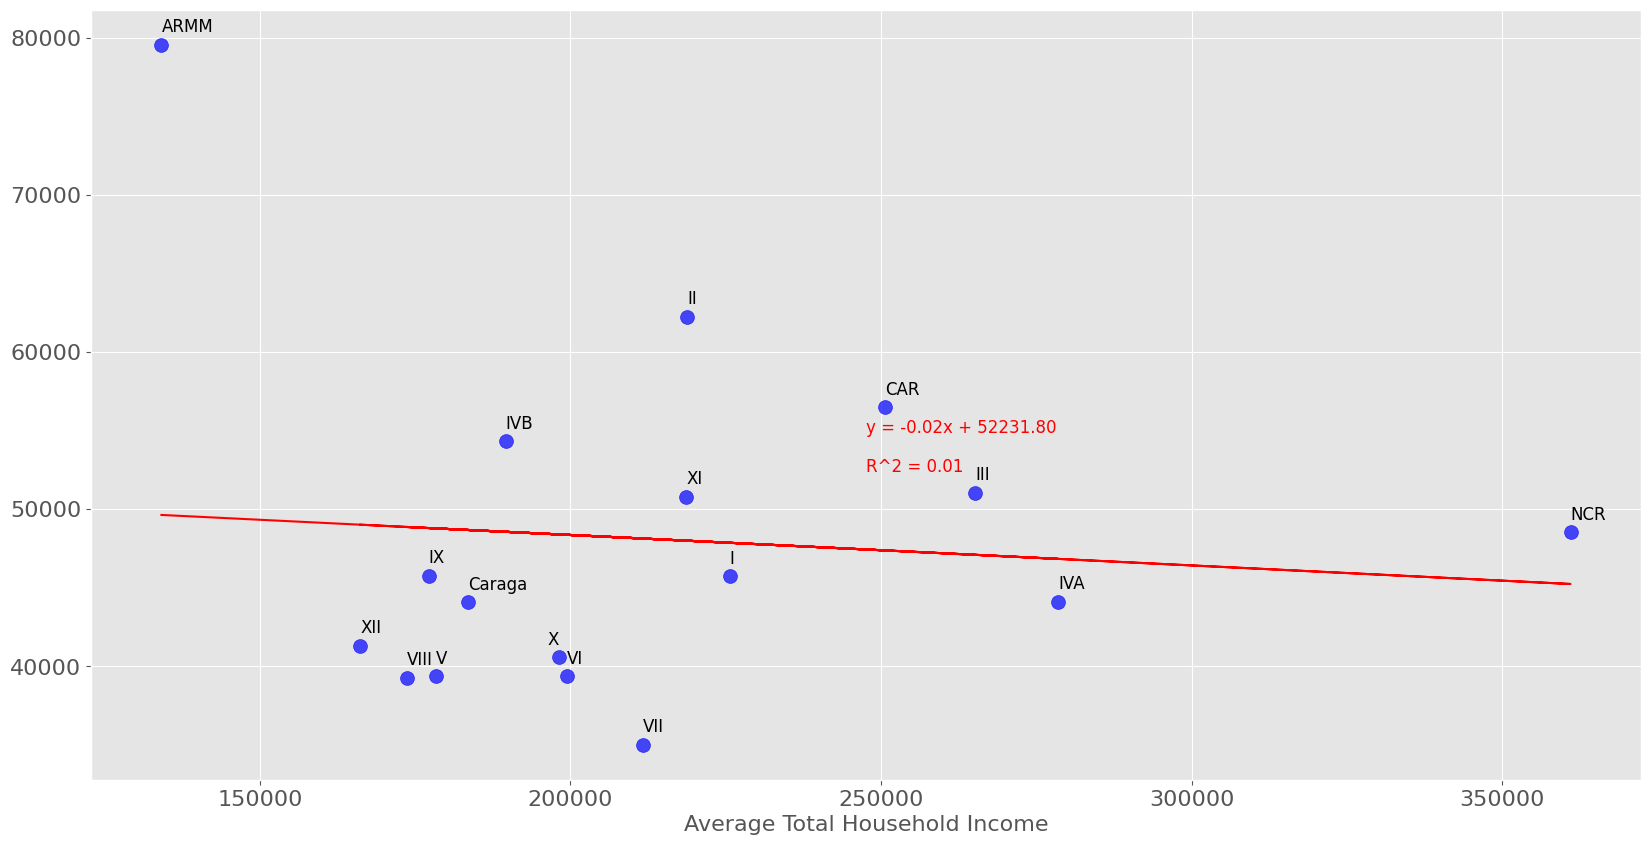

In [38]:
regional_scatter_plot(data, "Total Income from Entrepreneurial Acitivites")

There is no correlation between the average total income from entrepreneurial activities and the total household income.

# 4. Assets Data

In this section, data on household property and fixed assets will be explored.


1. What are the most common types of buildings, roof types, and wall types? Are certain types more prevalent in specific areas?
2. What percentage of households have access to electricity, different water supply sources, and modern toilet facilities? Are there any patterns based on location or house characteristics?
3. How common are appliances like televisions, refrigerators, air conditioners, and personal computers among households? Are there correlations between the number of appliances and household income?
4. What is the distribution of vehicle ownership (cars, motorcycles, etc.) among households? Is there a connection between vehicle ownership and household income?
5. Communication Devices: How common are landline phones, cellular phones, and wireless devices among households? Are these devices more prevalent in urban or rural areas?
6. Are newer houses equipped with more amenities and appliances? How does house age correlate with income and amenities?
7. Do households with different tenure statuses (rented, owned, etc.) have varying access to amenities and appliances?
8.  Are there regional differences in terms of housing characteristics, amenities, and income? How do rural and urban areas differ?
9. Does higher household income correlate with owning more vehicles, electronics, or appliances?

### 4.1 Property Information

In [39]:
property_data_continuous = ['House Floor Area', 'House Age', 'Number of bedrooms', 'Imputed House Rental Value']
property_data_discrete = [item for item in property_data if item not in property_data_continuous] 

In [40]:
# Plotting the continuous data
interact(bar_chart_regional_average, data=fixed(data), key=property_data_continuous)

interactive(children=(Dropdown(description='key', options=('House Floor Area', 'House Age', 'Number of bedroom…

<function utils.bar_utils.bar_chart_regional_average(data, key: str)>

In [41]:
create_dataframe_min_max(data, property_data_continuous)

,House Floor Area,House Age,Number of bedrooms,Imputed House Rental Value
0,CAR,NCR,CAR,NCR
1,XII - SOCCSKSARGEN,IX - Zasmboanga Peninsula,ARMM,ARMM


CAR has the highest average house floor area and number of bedrooms, while NCR has the average highest house age and imputed house rental value


In [42]:
interact(stacked_bar, data=fixed(data), key=property_data_discrete)

interactive(children=(Dropdown(description='key', options=('Type of Building/House', 'Type of Roof', 'Type of …

<function utils.bar_utils.stacked_bar(data, key)>

# 5. Household Head

In this section, we will analyze the data concering the family household head. We seek to answer the following questions:

1. What is the distribution of household head sex in the dataset? Are there more male or female household heads?
2. What is the average age of the household heads in the dataset?
3. How does the marital status of household heads vary in the dataset? What is the most common marital status?
4. What is the most common level of education completed by household heads?
5. How many household heads are employed in jobs or businesses? What is the ratio of employed to unemployed household heads?
6. What are the most common occupations among household heads?
7. How does the class of worker (e.g., self-employed, wage worker, unpaid family worker) vary among household heads?

In [43]:
householdhead_data_discrete = householdhead_data[:]
householdhead_data_discrete.remove('Household Head Age')

## 5.1 Household Head Age

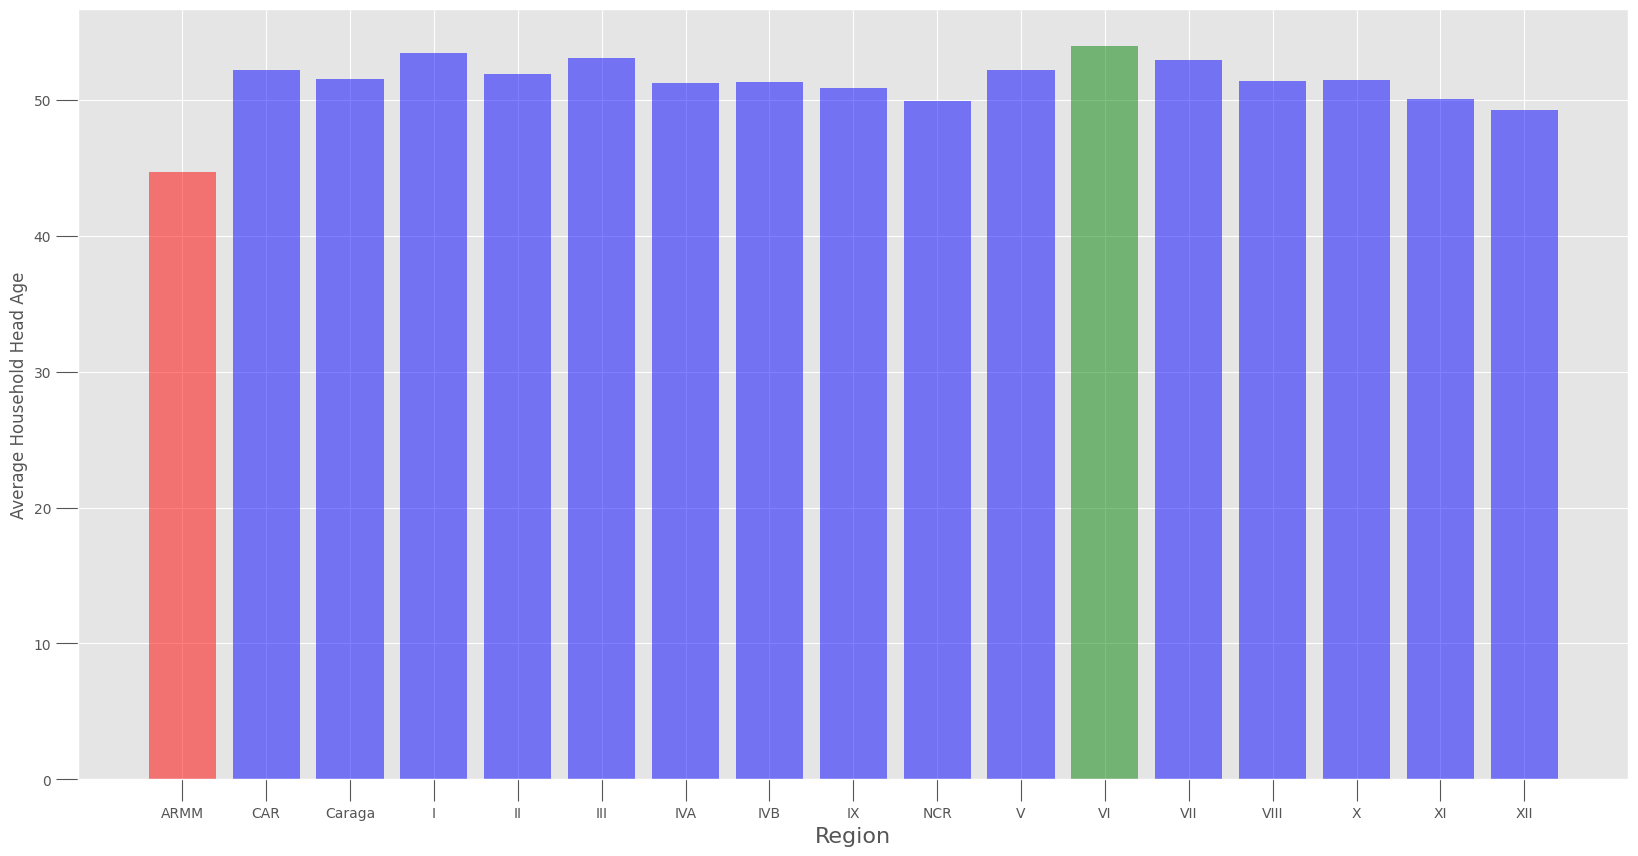

In [44]:
bar_chart_regional_average(data, key='Household Head Age')

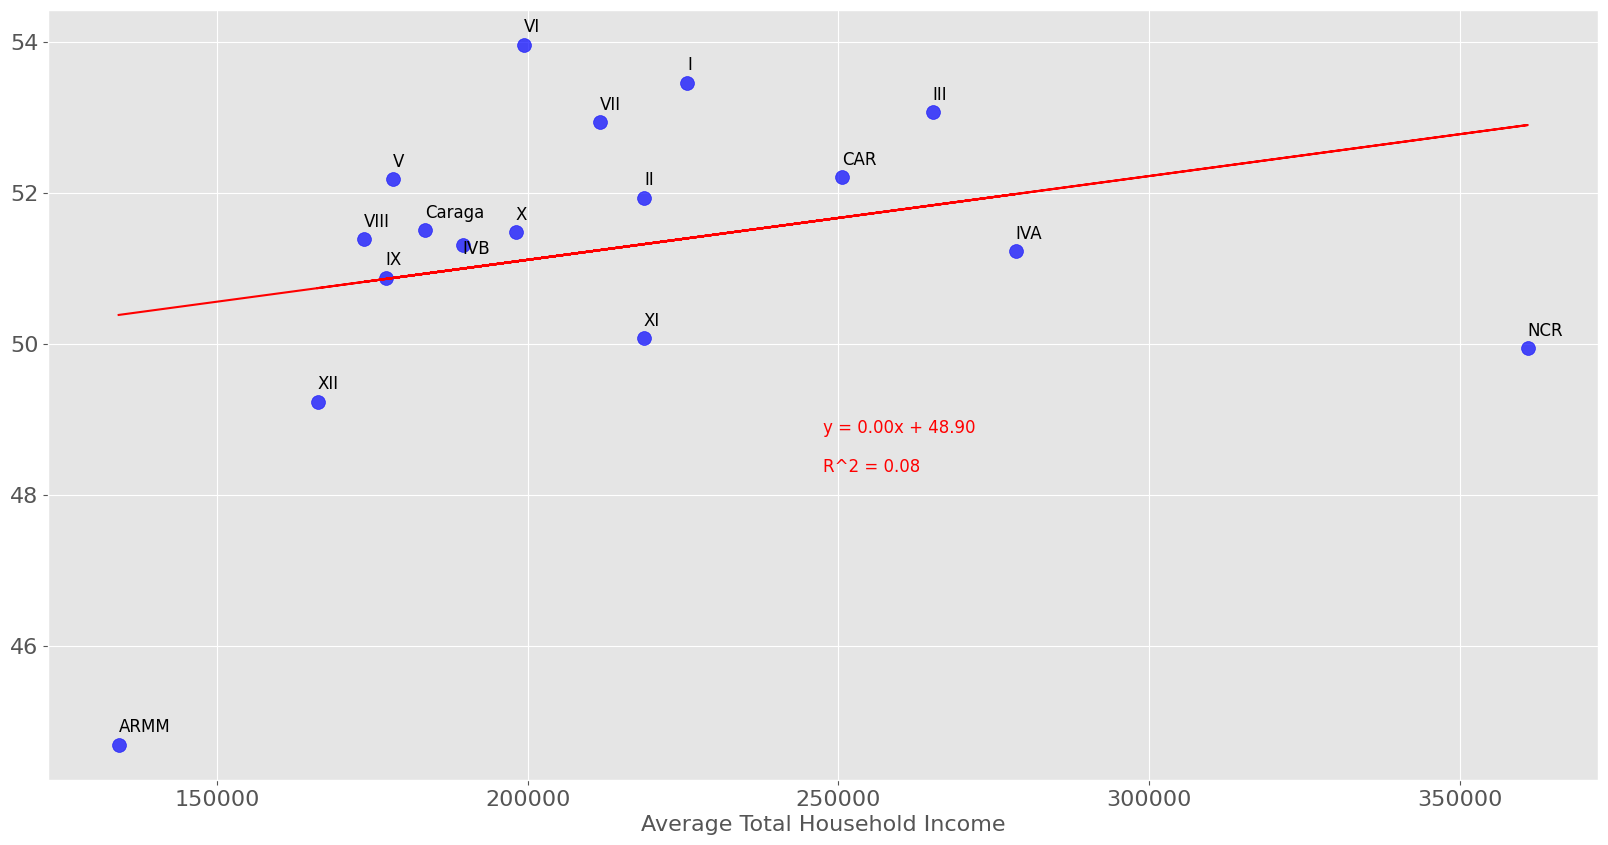

In [45]:
regional_scatter_plot(data, 'Household Head Age')

## 5.2 Household Head Education Attainment

In [46]:
from utils.data_utils import aggregate_householdhead_education

In [47]:
data = aggregate_householdhead_education(data)
interact(stacked_bar, data=fixed(data), key=householdhead_data_discrete)

interactive(children=(Dropdown(description='key', options=('Household Head Sex', 'Household Head Marital Statu…

<function utils.bar_utils.stacked_bar(data, key)>

## 5.2 Household Head Sex

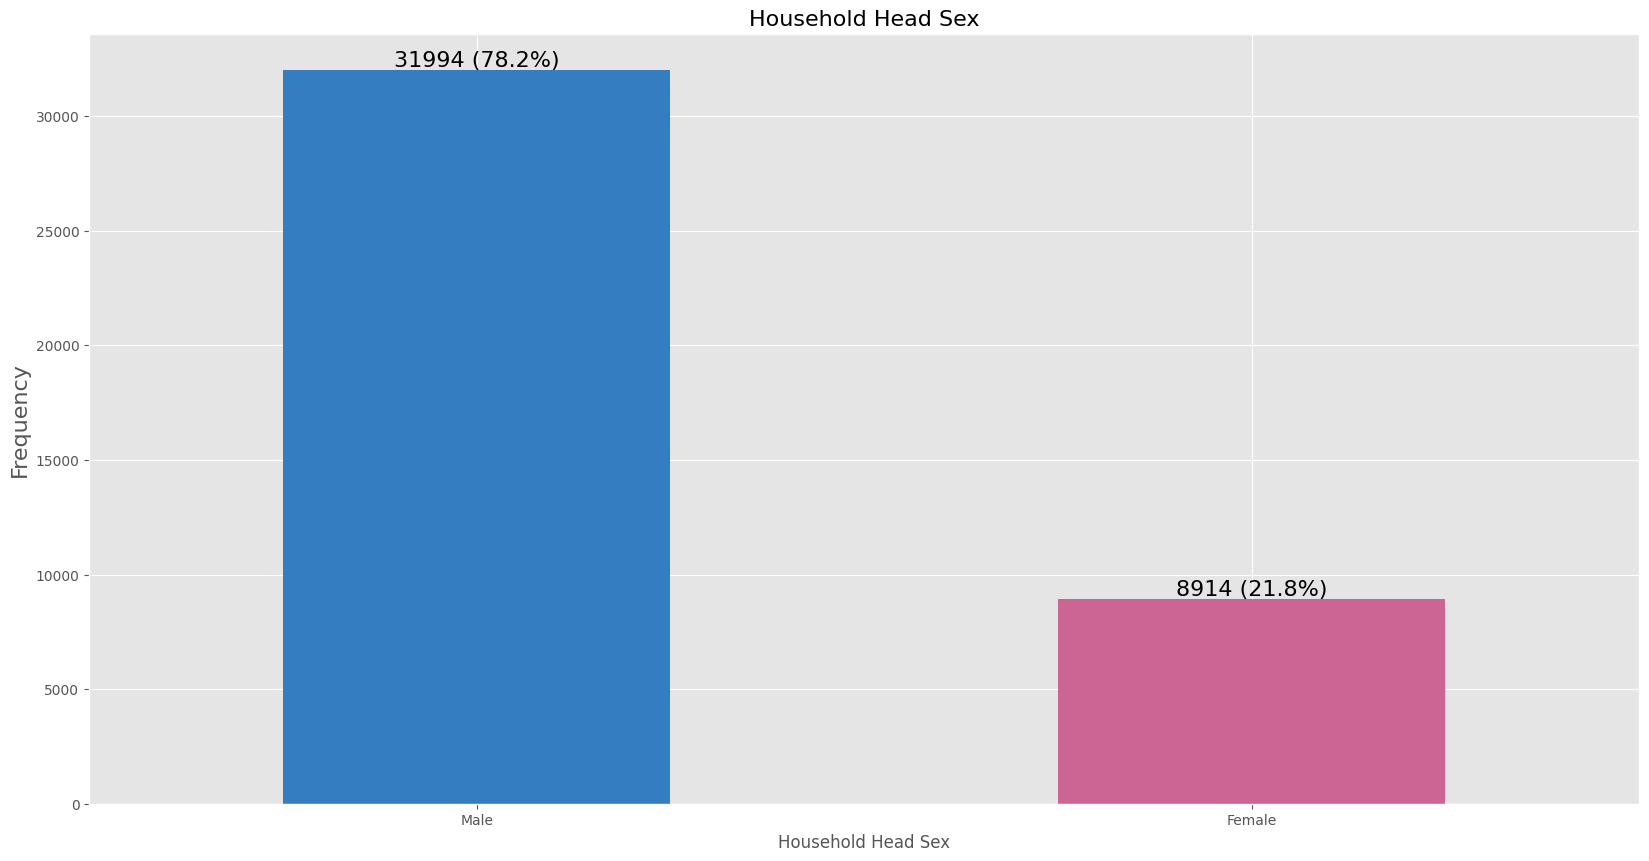

In [53]:
custom_palette = {'Male': '#347DC1', 'Female': '#CC6594'}
# Number of male vs female household head
gender_counts = data['Household Head Sex'].value_counts()
total_households = len(data)

# Calculate the percentages
male_percentage = (gender_counts['Male'] / total_households) * 100
female_percentage = (gender_counts['Female'] / total_households) * 100

# Plot the bar chart with percentage comparison
plt.figure(figsize=(20, 10))
ax = gender_counts.plot(kind='bar', color=['#347DC1', '#CC6594'], rot=0)

# Display the percentages on the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / total_households * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=16)

plt.ylabel('Frequency', fontsize=16)
plt.title('Household Head Sex', fontsize=16)
plt.show()


Based on the data, 78.2% of the household heads are males, while 21.8% are females. The data indicates a significant gender disparity among household heads, with males being predominant in this role. The higher representation of males as household heads may suggest prevailing cultural or societal norms, i.e., traditional gender roles within the context of household leadership.

In [54]:
ratio_df = data.groupby("Region")["Household Head Sex"].value_counts(normalize=True).unstack()
ratio_df["Female to Male Ratio"] = ratio_df["Female"] / ratio_df["Male"]

In [55]:
from utils.scatter_utils import regional_scatter_plot, basic_scatter_plot

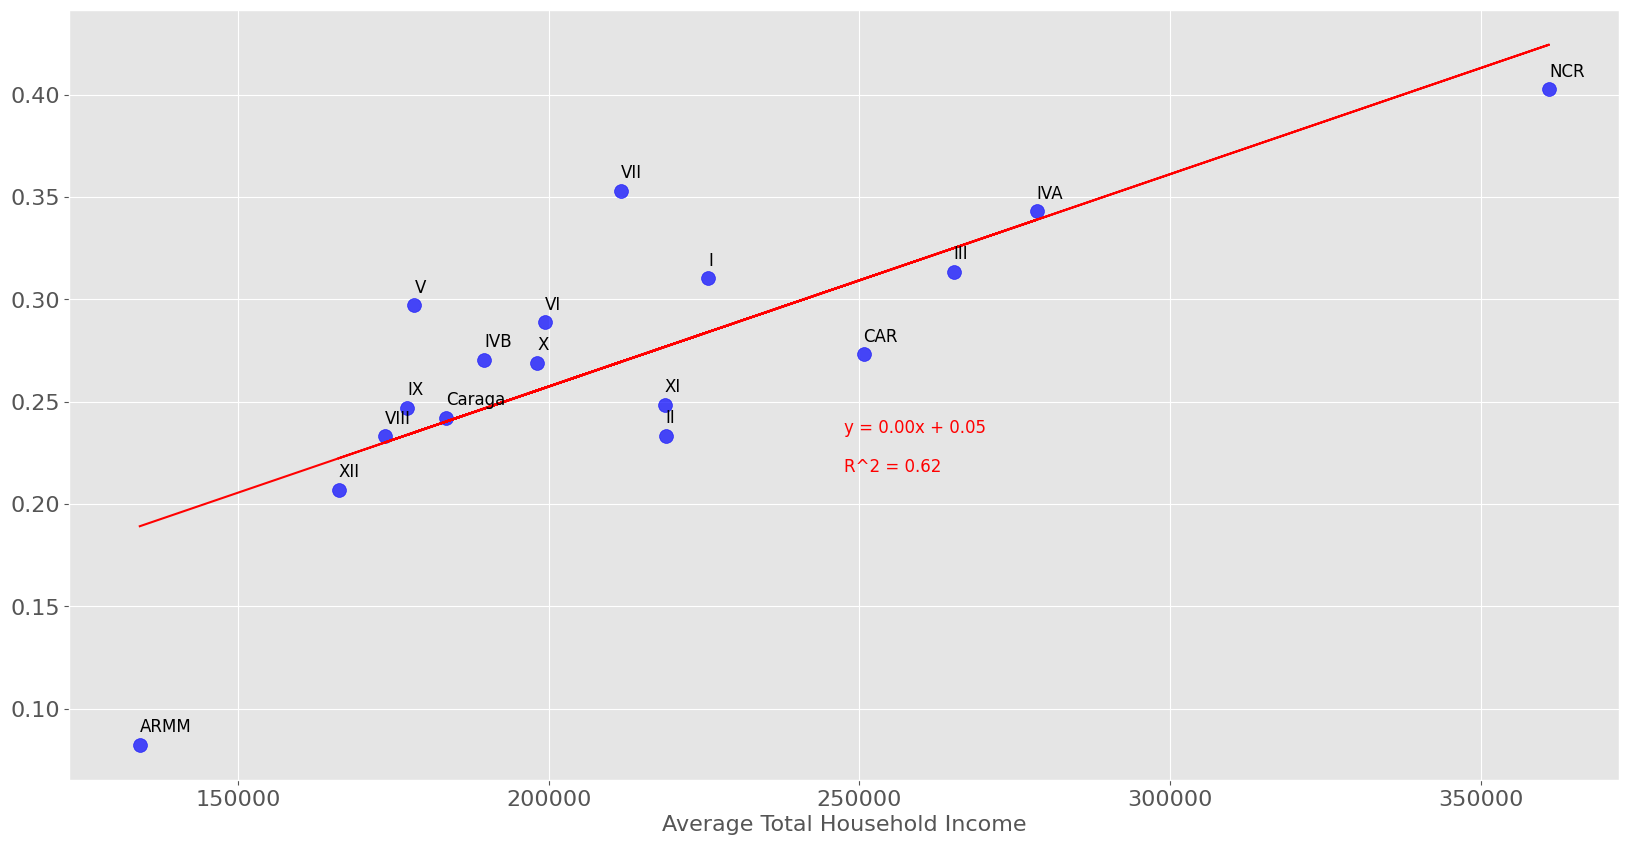

In [88]:
basic_scatter_plot(data.groupby("Region")["Total Household Income"].mean(), ratio_df["Female to Male Ratio"])

There is a high correlation between the female-to-male household ratio and the total household income across the regions.

## Bonus:

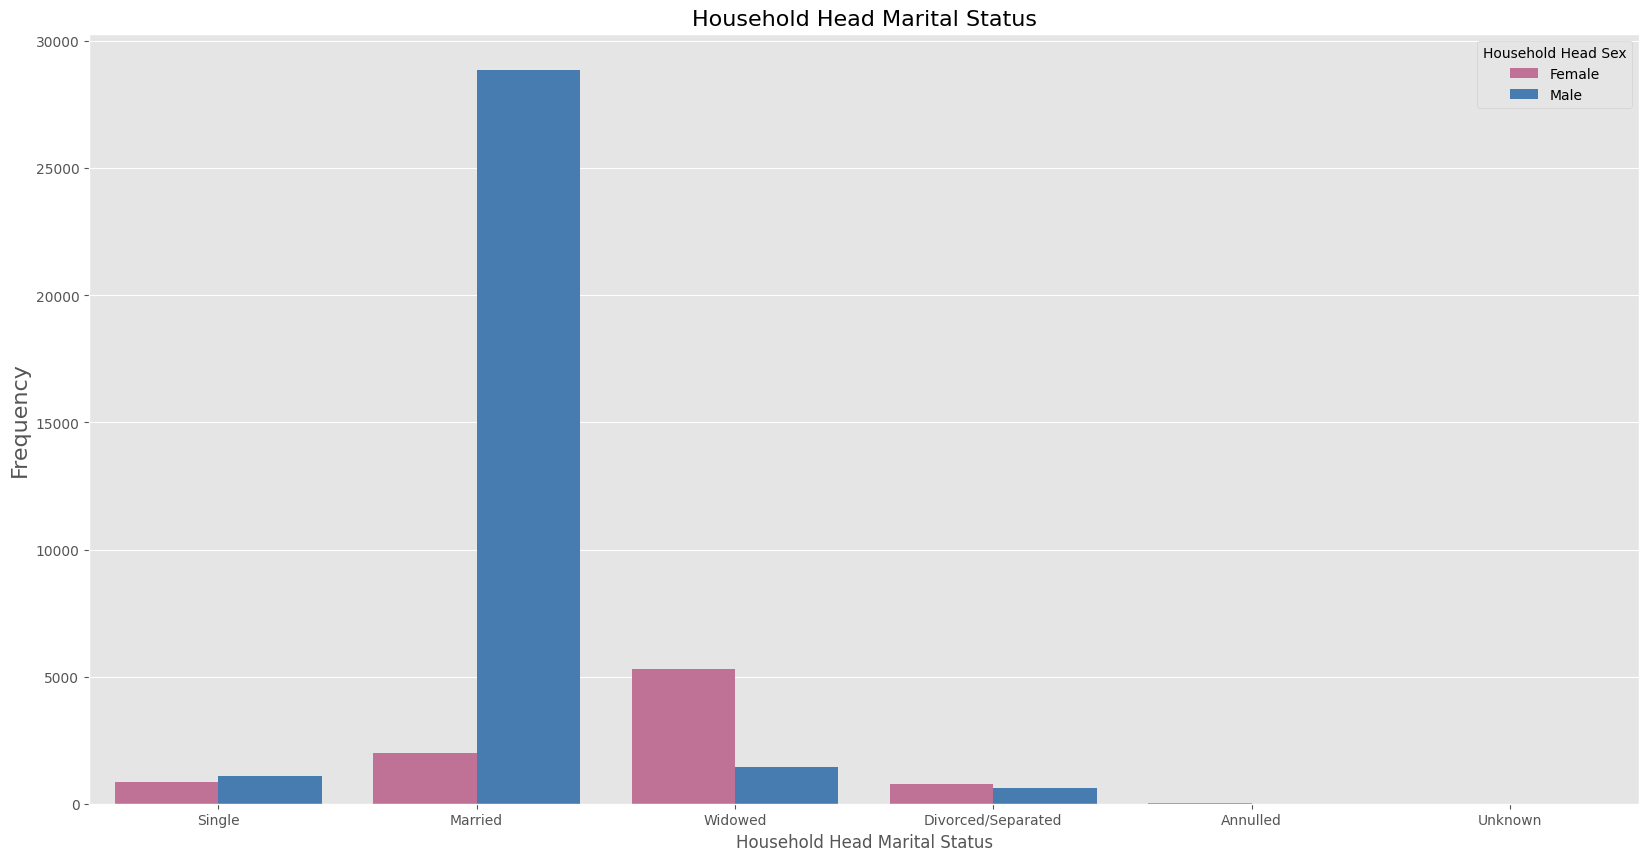

In [89]:
# Household Head Sex and Marital Status
import seaborn as sns

plt.figure(figsize=(20,10))
s = sns.countplot(x='Household Head Marital Status', hue='Household Head Sex', data=data, palette=custom_palette)
s.set_xticklabels(s.get_xticklabels())
plt.ylabel('Frequency', fontsize=16)
plt.title('Household Head Marital Status', fontsize=16)
plt.show()

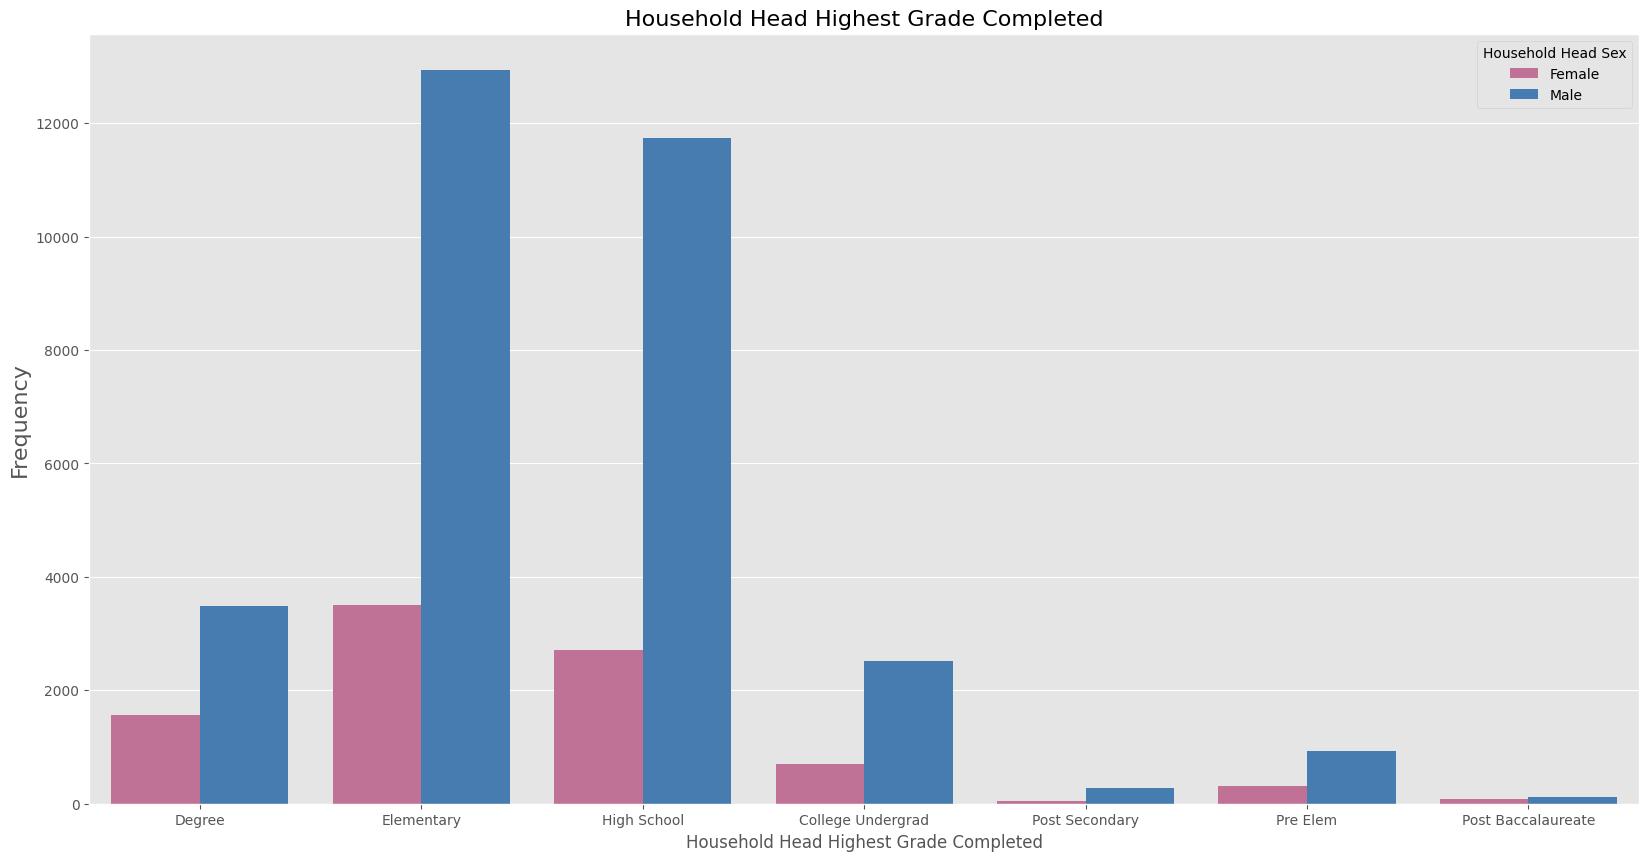

In [90]:
# Household Head Sex and Marital Status
plt.figure(figsize=(20,10))
s = sns.countplot(x='Household Head Highest Grade Completed', hue='Household Head Sex', data=data, palette=custom_palette)
s.set_xticklabels(s.get_xticklabels())
plt.ylabel('Frequency', fontsize=16)
plt.title('Household Head Highest Grade Completed', fontsize=16)
plt.show()